Contingency Table with Totals:
Flavour     Male  Female  Total
Chocolate     30      20     50
Vanilla       25      15     40
Strawberry    10      10     20
Total         65      45    110

Chi-square Statistic: 0.8931623931623931
Degrees of Freedom: 2
P-value: 0.6398118075447107
Expected Frequencies:
[[29.54545455 20.45454545]
 [23.63636364 16.36363636]
 [11.81818182  8.18181818]]

Decision at 5% significance level:
Null hypothesis is accepted (H0).


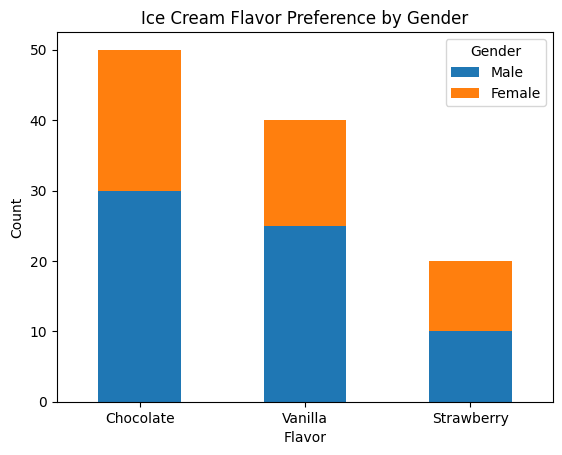

In [1]:
# !pip install statsmodels
import pandas as pd
import scipy.stats as stats

# Create the DataFrame
data = {
    "Flavour": ["Male", "Female"],
    "Chocolate": [30, 20],
    "Vanilla": [25, 15],
    "Strawberry": [10, 10]
}

df = pd.DataFrame(data)

# Create a contingency table
contingency_table = df.set_index('Flavour').T

# Calculate row and column totals
contingency_table['Total'] = contingency_table.sum(axis=1)  # Horizontal total
contingency_table.loc['Total'] = contingency_table.sum(axis=0)  # Vertical total

print("Contingency Table with Totals:")
print(contingency_table)

# Perform the chi-square test (excluding the total row and column)
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table.iloc[:-1, :-1])

# Print the results
print("\nChi-square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)
print("Expected Frequencies:")
print(expected)

# Set significance level
LevelOfSignificance = 0.05

# Decision based on the p-value
if p_value <= LevelOfSignificance:
    decision = "Null hypothesis is rejected (H0)."
else:
    decision = "Null hypothesis is accepted (H0)."

print("\nDecision at 5% significance level:")
print(decision)


import matplotlib.pyplot as plt

# Plotting the data
contingency_table.iloc[:-1, :-1].plot(kind='bar', stacked=True)
plt.title('Ice Cream Flavor Preference by Gender')
plt.xlabel('Flavor')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

